In [23]:
import pyuvdata
import pickle
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

In [24]:
with open('/lustre/rbyrne/equalization_coeffs_20250505.pkl', 'rb') as f:
    dictionary = pickle.load(f)

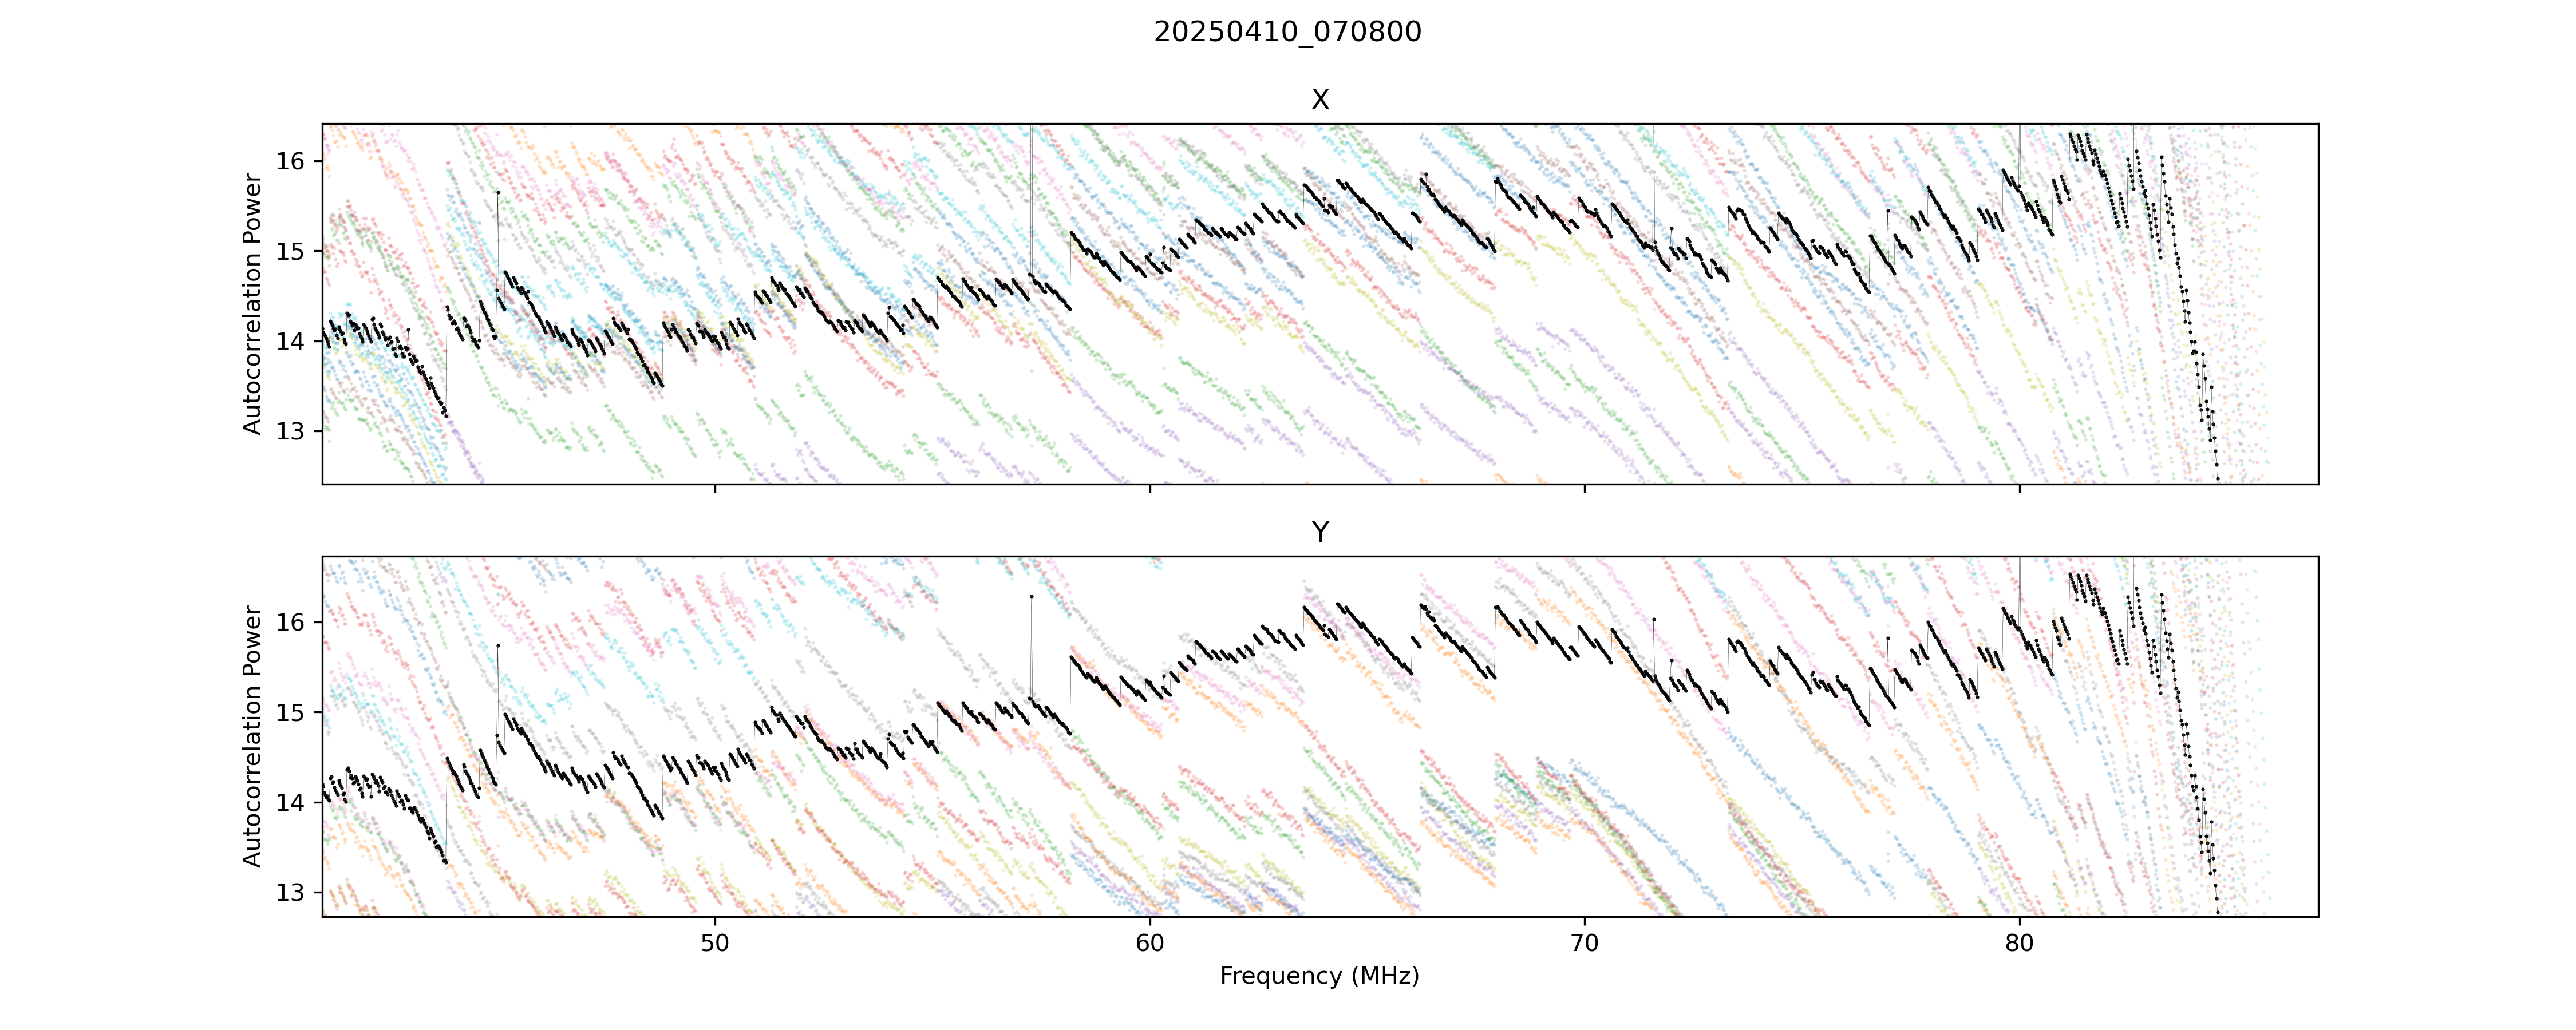

In [25]:
Image("/lustre/rbyrne/autocorrelation_plots/20250410_070800.png")

In [26]:
use_freq_bands = [
        "41",
        "46",
        "50",
        "55",
        "59",
        "64",
        "69",
        "73",
        "78",
        "82",
    ]

use_files = [f"/lustre/pipeline/cosmology/{freq}MHz/2025-04-10/07/20250410_070800_{freq}MHz_2pol.ms" for freq in use_freq_bands]
for file_ind, filename in enumerate(use_files):
    uvnew = pyuvdata.UVData()
    uvnew.read_ms(filename)
    uvnew.select(ant_str="autos")
    if file_ind == 0:
        uv = uvnew
    else:
        uv.fast_concat(uvnew, "freq", inplace=True, run_check=False)
uv.data_array[np.where(uv.data_array == 0)] = np.nan

Setting telescope_location to value in known_telescopes for OVRO-LWA.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 4024.3493639816525 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
Setting telescope_location to value in known_telescopes for OVRO-LWA.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 4024.349362727161 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
Setting telescope_location to value in known_telescopes for OVRO-LWA.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 4024.799874361046 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
Setting telescope_location to value in known_telescopes f

Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part


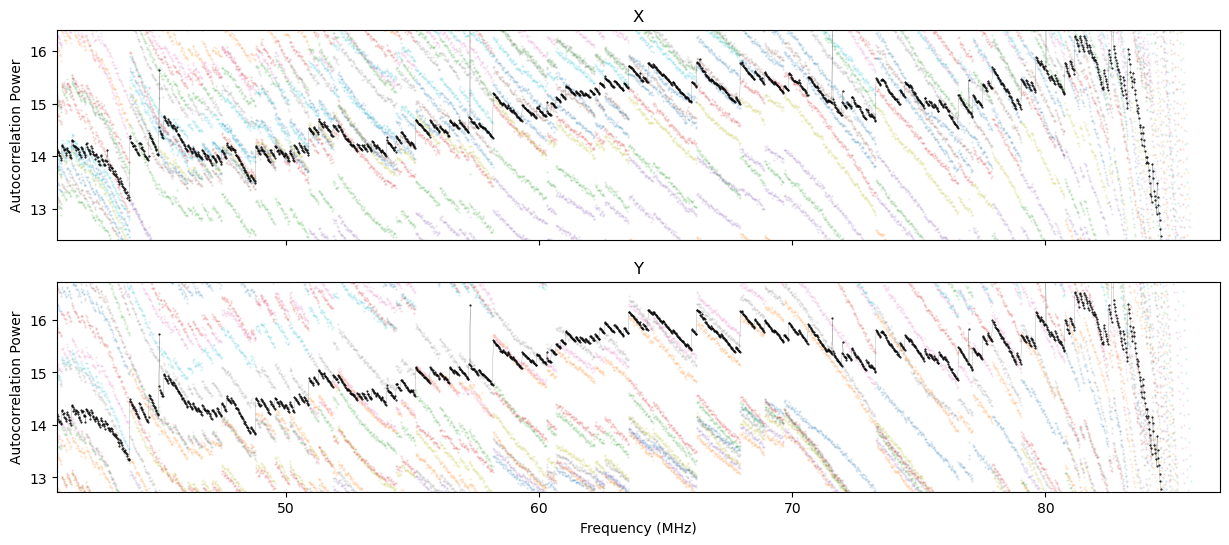

In [27]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(15,6))
ax[1].set_xlabel("Frequency (MHz)")
pol_names = ["X", "Y"]
for pol in range(2):
    ax[pol].set_ylabel("Autocorrelation Power")
    ax[pol].set_title(pol_names[pol])
    ax[pol].set_xlim(np.min(uv.freq_array)/1e6, np.max(uv.freq_array)/1e6)
    ax[pol].set_ylim(np.nanmean(uv.data_array[:, :, pol]) - 2, np.nanmean(uv.data_array[:,:,pol]) + 2)
    for ant in range(20):
        ax[pol].plot(uv.freq_array/1e6, uv.data_array[ant, :, pol], ".", markersize=1, alpha=0.2)
    ax[pol].plot(uv.freq_array/1e6, np.nanmean(uv.data_array, axis=0)[:, pol], ".-", linewidth=0.1, markersize=1, color="black")
plt.show()


In [28]:
dictionary.keys()

dict_keys(['coeffs_set', 'coeffs_set_inds', 'antnames', 'bps', 'snaps', 'adcs'])

In [29]:
(dictionary["antnames"][0])

'LWA-266A'

Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part


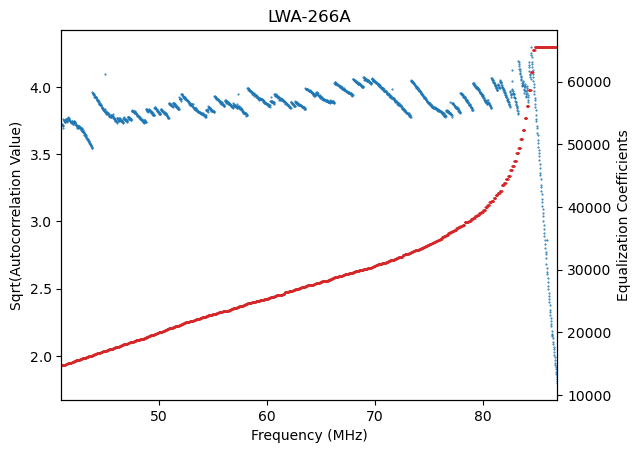

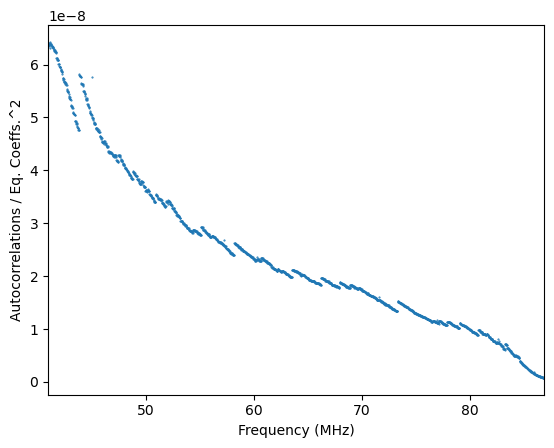

In [95]:
for ant_ind, ant in enumerate(dictionary["antnames"][0:1]):
    eq_coeffs = dictionary["coeffs_set"][dictionary["coeffs_set_inds"][ant_ind]]
    eq_coeffs = np.repeat(eq_coeffs, 8)  # One coefficient per 8 channels
    eq_freqs = np.arange(len(eq_coeffs)) * np.mean(uv.channel_width)

    # Truncate equalization coefficents to include only those saved in the data
    eq_coeffs = eq_coeffs[560:-464]
    eq_freqs = eq_freqs[560:-464]

    use_antname = f"{ant[0:3]}{ant[4:7]}"
    if ant[-1] == "A":
        use_pol = -5
    elif ant[-1] == "B":
        use_pol = -6
    autocorrs_single_ant = uv.select(antenna_names=use_antname, polarizations=use_pol, inplace=False)


    fig, ax1 = plt.subplots()
    ax1.set_title(ant)
    ax1.set_xlabel("Frequency (MHz)")
    ax1.plot(autocorrs_single_ant.freq_array/1e6, np.sqrt(autocorrs_single_ant.data_array[0, :, 0]), ".", markersize=1)
    ax1.set_ylabel("Sqrt(Autocorrelation Value)")
    #ax1.set_ylim([3.5,4.5])
    ax1.set_xlim([np.min(autocorrs_single_ant.freq_array)/1e6, np.max(autocorrs_single_ant.freq_array)/1e6])
    #ax1.set_xlim([50, 51])

    ax2=ax1.twinx()
    ax2.plot(eq_freqs/1e6, eq_coeffs, ".", markersize=1, color="tab:red")
    ax2.set_ylabel("Equalization Coefficients")
    #ax2.set_ylim([17500,22500])
    plt.show()
    plt.close()

    lowest_eq_ind = np.where(eq_freqs == np.min(autocorrs_single_ant.freq_array))[0][0]
    highest_eq_ind = np.where(eq_freqs == np.max(autocorrs_single_ant.freq_array))[0][0]
    eq_coeffs = eq_coeffs[lowest_eq_ind:highest_eq_ind+1]
    eq_freqs = eq_freqs[lowest_eq_ind:highest_eq_ind+1]

    autos_normalized = autocorrs_single_ant.data_array[0, :, 0] / (eq_coeffs)**2.0
    plt.plot(autocorrs_single_ant.freq_array/1e6, autos_normalized, ".", markersize=1)
    plt.xlim([np.min(autocorrs_single_ant.freq_array)/1e6, np.max(autocorrs_single_ant.freq_array)/1e6])
    plt.ylabel("Autocorrelations / Eq. Coeffs.^2")
    plt.xlabel("Frequency (MHz)")
    plt.show()
    plt.close()

In [51]:
np.max(dictionary["bps"])

2

In [62]:
np.where(eq_freqs == np.min(autocorrs_single_ant.freq_array[0]))[0][0]

1152

In [82]:
lowest_eq_ind = np.where(eq_freqs == np.min(autocorrs_single_ant.freq_array[0]))[0][0]
highest_eq_ind = np.where(eq_freqs == np.max(autocorrs_single_ant.freq_array[0]))[0][0]

In [83]:
print(lowest_eq_ind)
print(highest_eq_ind)

0
0


In [86]:
np.min(autocorrs_single_ant.freq_array)

40960937.5

In [87]:
np.max(autocorrs_single_ant.freq_array)

86874511.71875